## Module 2:

## Team Members:
*Jaya Kinley and Luke Shee*

## Project Title:
*Depth-Based Prediction of Lung Fibrosis Using Image Analysis*



## Project Goal:
This project seeks to to create an image analysis system that can predict how much lung fibrosis is present at different biopsy depths. This will help support the design of a new lung biopsy device that can better detect early signs of fibrosis in people affected by vaping.

## Disease Background: 
*Fill in information and please note that this module is truncated and only has 5 bullets (instead of the 11 that you did for Module #1).*

### Prevalence & incidence 
(Source: https://medlineplus.gov/genetics/condition/idiopathic-pulmonary-fibrosis/#frequency and https://respiratory-research.biomedcentral.com/articles/10.1186/s12931-021-01791-z#citeas)
  - **Prevalence**: Globally, It’s predicted that every 13-20 people out of 100,000 have idiopathic pulmonary fibrosis, generally making the condition rare.
    - It’s estimated by MedlinePlus ~100,000 people in the U.S. have idiopathic pulmonary fibrosis. Other sources, however, calculate different values for the prevalence in America, like a study from Maher et al. (the 2nd source) estimating that 2.4 out of 10,000 Americans have idiopathic pulmonary fibrosis (totally up to around 81,600 cases currently).
  - **Incidence**: Every year, 30 to 40 thousand newly diagnosed cases for idiopathic pulmonary fibrosis occur.

### Risk factors (genetic, lifestyle) 
(Sources: https://www.pulmonaryfibrosis.org/understanding-pff/types-of-pulmonary-fibrosis/idiopathic-pulmonary-fibrosis and https://www.youtube.com/watch?v=Z6_0WkceY88)
  - Some general risk factors may include being male and/or growing to an old age, as well as the lifestyle risk factor of smoking.
    - While not as certain as the aforementioned risk factors, external exposures to air pollution or viral infection may also correlate to idiopathic pulmonary fibrosis diagnosis.  
  - Concerning genetic risk factors, people who inherited genes, including “MUC5B, TERT, TERC, DKC1, RTEL1, AKAP13, DSP, FAM13A, DPP9, and TOLLIP,” may have a higher chance of getting pulmonary fibrosis.

### Symptoms 
(Source: https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690)
  - Shortness of breath
  - Dry cough
  - Extreme tiredness
  - Weight loss that's not intended
  - Aching muscles and joints
  - Widening and rounding of the tips of the fingers or toes, called clubbing
    
### Standard of care treatment(s) 
(Sources: https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/diagnosis-treatment/drc-20353695 and https://www.lung.org/lung-health-diseases/lung-disease-lookup/pulmonary-fibrosis/patients/how-is-pulmonary-fibrosis-treated/medications)
  - Lung scarring and thickening that occurs in pulmonary fibraosi cannot be repaired
  - no treatment has proved effective in stopping disease from worsening
  - treatments that improve symptoms/slow progression/imprve quality of life
    - **medicines**: pirfenidone (Esbriet) or nintedanib (Ofeb): anti-fibrotic agents, may help slow worsening of fibrosis and may prevent bouts of aggressive symptom onset
    - **other medicines**: drugs to reduce inflammation (e.g. steroids), drugs to treat acid reflux (commonly occurs in people with pulmonary fibrosis), drugs to treat cough
    - **oxygen therapy**: makes breathing/exercise easier, prevents/lessens complications from low blood oxygen levels, lessens strain on right side of heart, improves sleep
    - **pulmonary rehibilitation**: physical exercise to improve daily function, breathing techniques improving lung efficiency, nutritional counseling, emotional counseling
    - **lung transplant**: can improve quality/length of life, can involve complications (rejection or infection), requires lifelong medicinal treatment following transplant  


### Biological mechanisms (anatomy, organ physiology, cell & molecular physiology) 
(Sources: https://www.youtube.com/watch?v=Z6_0WkceY88 and https://www.youtube.com/watch?v=s2owdwl5VacLinks)
  - normally, tissue of alveoli is soft and flexible, allowing easy breathing and O2 exchange between alveoli and capillaries
  - in IPF, tissue forms scarring, which impairs the lungs' ability to absorb O2 and function normally
  - excess collagen (scar tissue) in interstatial tissue of the 
  - leads to progressive loss of scar tissue 
  - anatomy of alveoli
    - type 1 epithelial cells (pneymocytes): squamous cells, near continupus barrier between air and connective tissue
    - type 2 pneymocytes: studded throughout type 1, shaped like cubes, have microvilli, secrete surfactant (prevent alveoli from collapsing during exhilation), can divide and make more type 2 or type 1 pneumocytes
  - interstatial tissue
    - has macrophages and fibroblasts
    - between type 2 pneumocytes and capillaries
  - when alveolar lining damaged, proliferation of fibroblassts to myofibroblasts stimulated --> secrete reticular and elastic fibers
  - myofibroblasts undergo apoptosis (programmed cell death)
  - once process is triggered, type 2 pneumocytes over-proliferate during repair process --> too many myofibroblasts and too much collagen
  - myofibroblasts don't undergo apoptosis proberly and continue to produce more collagen
  - collagen accumulates and thickens interstatial layer --> problems with ventilation and oxygenation, causes lungs to become stiff
  - excess collagen leads to loss of alveoli, creating cysts surrounded by thick walls (honeycombing)

## Data-Set: 
The dataset used in this project consists of lung biopsy mask images taken at different tissue depths, measured in microns. Each image represents a cross-section of lung tissue stained to highlight areas of fibrosis. The white regions in the images correspond to fibrotic tissue, while the black regions represent healthy lung areas. These images were collected using histological imaging techniques similar to those described in biomedical imaging studies such as the SEA-AD dataset from the BRAIN Initiative. The data provide a way to analyze how the amount of fibrosis changes with depth in the lung.

## Data Analyis: 
This code analyzes a set of lung biopsy mask images to estimate the amount of fibrotic tissue at different depths in the lung. It loads each image, counts the number of black and white pixels, and calculates the percentage of white pixels, which represent fibrosis. The results are saved to a CSV file, and an interpolation function is used to estimate the fibrosis percentage at any chosen depth. Finally, the code generates plots showing how the percentage of fibrotic tissue changes with biopsy depth and highlights the interpolated point in red.

### Importing Libraries:

In [75]:
from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

### Load Image Files and Depth Data:

In [76]:
"""
filenames = [
    r"/Users/jayakinley/Desktop/compbme/course_files_export/MASK_Sk658 Llobe ch010032.jpg",
    r"/Users/jayakinley/Desktop/compbme/course_files_export/MASK_Sk658 Llobe ch010146.jpg",
    r"/Users/jayakinley/Desktop/compbme/course_files_export/MASK_SK658 Slobe ch010110.jpg",
    r"/Users/jayakinley/Desktop/compbme/course_files_export/MASK_SK658 Slobe ch010063.jpg",
    r"/Users/jayakinley/Desktop/compbme/course_files_export/MASK_SK658 Slobe ch010136.jpg",
    r"/Users/jayakinley/Desktop/compbme/course_files_export/MASK_SK658 Slobe ch010098.jpg",
    ]
"""
filenames = [
    r"/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_Sk658 Llobe ch010032.jpg",
    r"/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_Sk658 Llobe ch010146.jpg",
    r"/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010110.jpg",
    r"/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010063.jpg",
    r"/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010136.jpg",
    r"/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010098.jpg",
    ]



# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    500,
    2000,
    5300,
    7400,
    9200,
    10000
    ]

### Read and Store Images: 

In [77]:
images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

### Count Black and White Pixels:

In [78]:
for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

Counts of pixel by color in each image
White pixels in image 0: 48667
Black pixels in image 0: 4145637

White pixels in image 1: 145829
Black pixels in image 1: 4048475

White pixels in image 2: 96012
Black pixels in image 2: 4098292

White pixels in image 3: 120910
Black pixels in image 3: 4073394

White pixels in image 4: 163638
Black pixels in image 4: 4030666

White pixels in image 5: 383479
Black pixels in image 5: 3810825



### Calculate Percent White Pixels

In [79]:
for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

Percent white px:
/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_Sk658 Llobe ch010032.jpg:
1.1603116989135742% White | Depth: 500 microns

/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_Sk658 Llobe ch010146.jpg:
3.476834297180176% White | Depth: 2000 microns

/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010110.jpg:
2.289104461669922% White | Depth: 5300 microns

/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010063.jpg:
2.882719039916992% White | Depth: 7400 microns

/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010136.jpg:
3.9014339447021484% White | Depth: 9200 microns

/Users/Lukin/OneDrive/Desktop/UVA Stuff/Comp BME/Lung_Fibrosis_Jupyter/course_files_export/MASK_SK658 Slobe ch010098.jpg:
9.1428518

### Save Results to CSV File

In [80]:
import pandas as pd

df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents
})

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")


CSV file 'Percent_White_Pixels.csv' has been created.


### Interpolate Fibrosis at a Chosen Depth

In [81]:
interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='quadratic')  # You can also use 'linear', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

The interpolated point is at the x-coordinate 6300.0 and y-coordinate 2.597792500607033.


### Plot Fibrosis vs. Depth

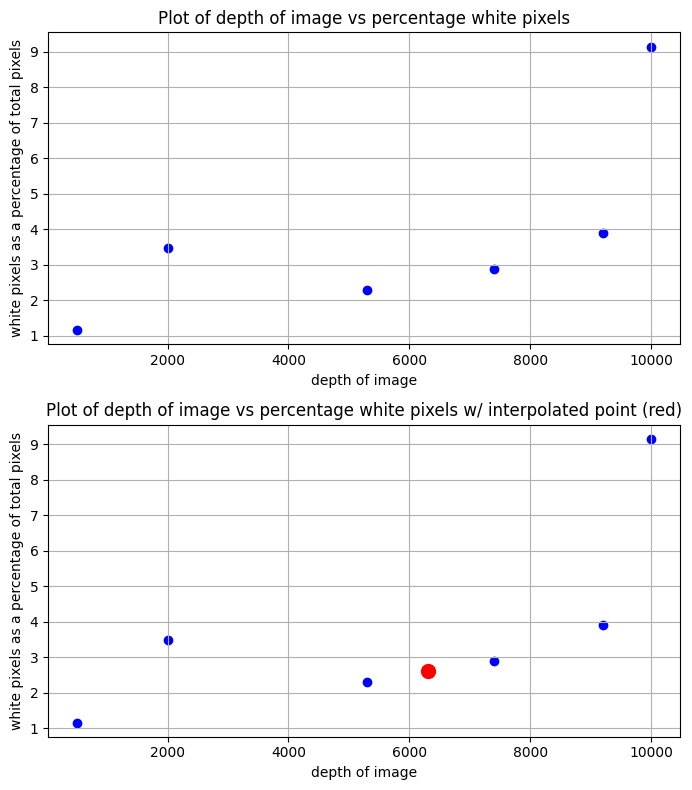

In [ ]:
# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
fig.set_figwidth(7)
fig.set_figheight(8) # Gets rids of overlapping y-axis labels
plt.tight_layout()
plt.show()

## Verify and validate your analysis: 
*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 

### Current Progress
- 10/2/2025: So far, the team has followed along with the examples outlined by Professor Pierce-Cottler, and is learning the workings of the main.py file at pace with the rest of the class. The team also set up a shared GitHub repository to collaborate.
- 10/7/2025: First half of Disease background has been finished (Jaya's half), and the team kept following code examples from class and started writing notes on our progress.
- 10/8/2025: The team completed other parts for Disease background section (Luke's half) and progress notes, as well as some TA questions.

### Code Progress
We used GitHub to save, update, and collaborate on our Jupyter notebook and other Module 2 files. Here's the link to our GitHub that contains our commit history of our code:
https://github.com/Lukinator3000/LungFibrosisModule

## QUESTIONS FOR YOUR TA: 
- Since most of the code was written for us in the template, is there anything you'd like us to add or edit in the provided code, such as additional graphical studies, statistical tests, or extra documentation?
- Besides learning idiopathic pulmonary fibrosis, what topics in this module should we target our learning on in particular? 